In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [73]:
filepath = 'volve production data.xlsx'

In [74]:
daily_df = pd.read_excel(filepath, sheet_name='Daily Production Data')
monthly_df = pd.read_excel(filepath, sheet_name='Monthly Production Data')

In [75]:
print(daily_df.shape)
print(monthly_df.shape)
print(daily_df.head())
print(daily_df.columns)
print(monthly_df.columns)

(15634, 24)
(527, 10)
     DATEPRD WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0 2014-04-07  NO 15/9-F-1 C                7405         15/9-F-1 C   
1 2014-04-08  NO 15/9-F-1 C                7405         15/9-F-1 C   
2 2014-04-09  NO 15/9-F-1 C                7405         15/9-F-1 C   
3 2014-04-10  NO 15/9-F-1 C                7405         15/9-F-1 C   
4 2014-04-11  NO 15/9-F-1 C                7405         15/9-F-1 C   

   NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
0         3420717          VOLVE             369304    MÆRSK INSPIRER   
1         3420717          VOLVE             369304    MÆRSK INSPIRER   
2         3420717          VOLVE             369304    MÆRSK INSPIRER   
3         3420717          VOLVE             369304    MÆRSK INSPIRER   
4         3420717          VOLVE             369304    MÆRSK INSPIRER   

   ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  ...  AVG_CHOKE_UOM  AVG_WHP_P  \
0            0.0                0.00000  ...

In [76]:
print("\n Data Type")
print(daily_df.dtypes)

print("\n Missing Values")
print(daily_df.isnull().sum())


 Data Type
DATEPRD                     datetime64[ns]
WELL_BORE_CODE                      object
NPD_WELL_BORE_CODE                   int64
NPD_WELL_BORE_NAME                  object
NPD_FIELD_CODE                       int64
NPD_FIELD_NAME                      object
NPD_FACILITY_CODE                    int64
NPD_FACILITY_NAME                   object
ON_STREAM_HRS                      float64
AVG_DOWNHOLE_PRESSURE              float64
AVG_DOWNHOLE_TEMPERATURE           float64
AVG_DP_TUBING                      float64
AVG_ANNULUS_PRESS                  float64
AVG_CHOKE_SIZE_P                   float64
AVG_CHOKE_UOM                       object
AVG_WHP_P                          float64
AVG_WHT_P                          float64
DP_CHOKE_SIZE                      float64
BORE_OIL_VOL                       float64
BORE_GAS_VOL                       float64
BORE_WAT_VOL                       float64
BORE_WI_VOL                        float64
FLOW_KIND                           object

In [77]:
well_name = daily_df['NPD_WELL_BORE_NAME'].unique()[0]
well_data = daily_df[daily_df['NPD_WELL_BORE_NAME'] == well_name]

In [78]:
well_data = well_data.sort_values("DATEPRD")

In [79]:
wells = daily_df['NPD_WELL_BORE_NAME'].unique()
print(f"Total number of wells: {len(wells)}")

Total number of wells: 7


In [80]:
well_summary = daily_df.groupby('NPD_WELL_BORE_NAME')[["BORE_OIL_VOL", "BORE_WAT_VOL", "BORE_GAS_VOL"]].agg(['sum']).reset_index()
well_summary = well_summary.sort_values(('BORE_OIL_VOL', 'sum'), ascending=False)
print("\n Well Summary (Top Wells by Oil Volume)")
print(well_summary.head(10))


 Well Summary (Top Wells by Oil Volume)
  NPD_WELL_BORE_NAME BORE_OIL_VOL BORE_WAT_VOL  BORE_GAS_VOL
                              sum          sum           sum
2          15/9-F-12   4579609.55   6833320.37  6.675423e+08
3          15/9-F-14   3942233.39   7121249.74  5.780095e+08
1          15/9-F-11   1147849.10   1090806.27  1.743105e+08
0         15/9-F-1 C    177709.33    207302.39  2.644092e+07
4        15/9-F-15 D    148518.56     52366.40  2.250535e+07
6           15/9-F-5     41160.68     13533.18  6.561826e+06
5           15/9-F-4         0.00         0.00  0.000000e+00


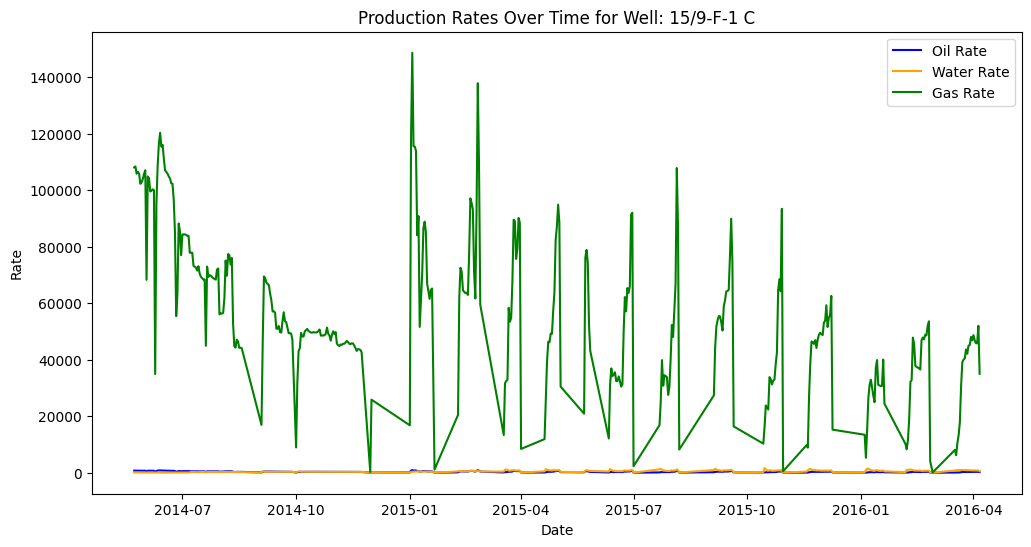

In [81]:
well_data = well_data[(well_data['BORE_OIL_VOL'] != 0) & 
                      (well_data['BORE_WAT_VOL'] != 0) & 
                      (well_data['BORE_GAS_VOL'] != 0)]
plt.figure(figsize=(12, 6))
plt.plot(well_data['DATEPRD'], well_data['BORE_OIL_VOL'], label='Oil Rate', color='blue')
plt.plot(well_data['DATEPRD'], well_data['BORE_WAT_VOL'], label='Water Rate', color='orange')
plt.plot(well_data['DATEPRD'], well_data['BORE_GAS_VOL'], label='Gas Rate', color='green')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title(f'Production Rates Over Time for Well: {well_name}')
plt.legend()
plt.show()  

<Axes: title={'center': 'Oil production for all wells'}, xlabel='DATEPRD', ylabel='BORE_OIL_VOL'>

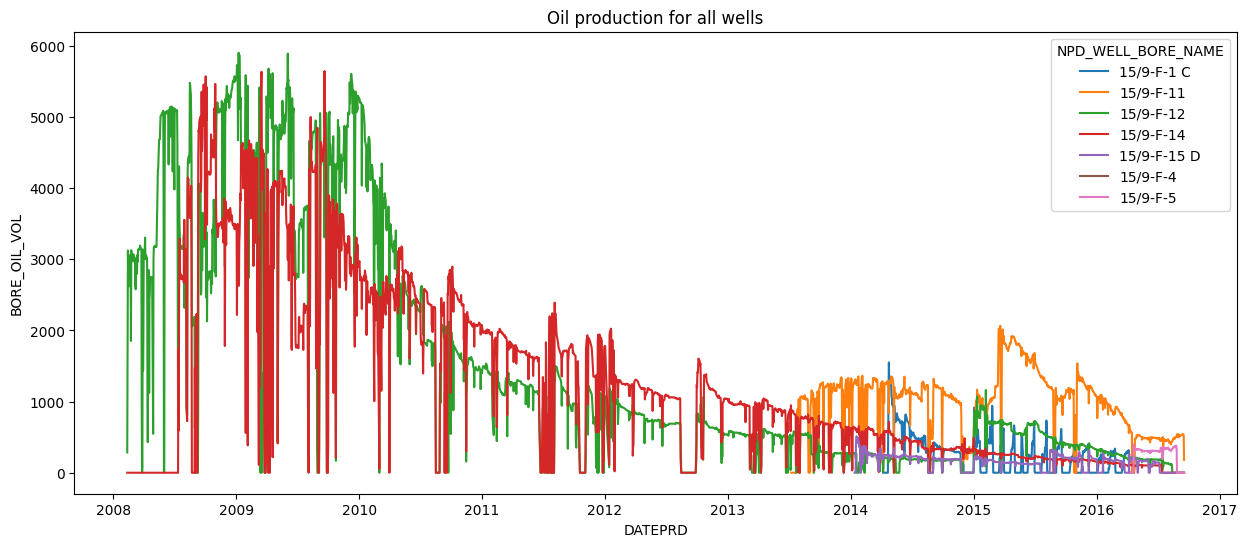

In [82]:
plt.figure(figsize=(15,6))
plt.title("Oil production for all wells")
sns.lineplot(data = daily_df ,x ="DATEPRD" , y = "BORE_OIL_VOL" ,hue ="NPD_WELL_BORE_NAME",)

<function matplotlib.pyplot.show(close=None, block=None)>

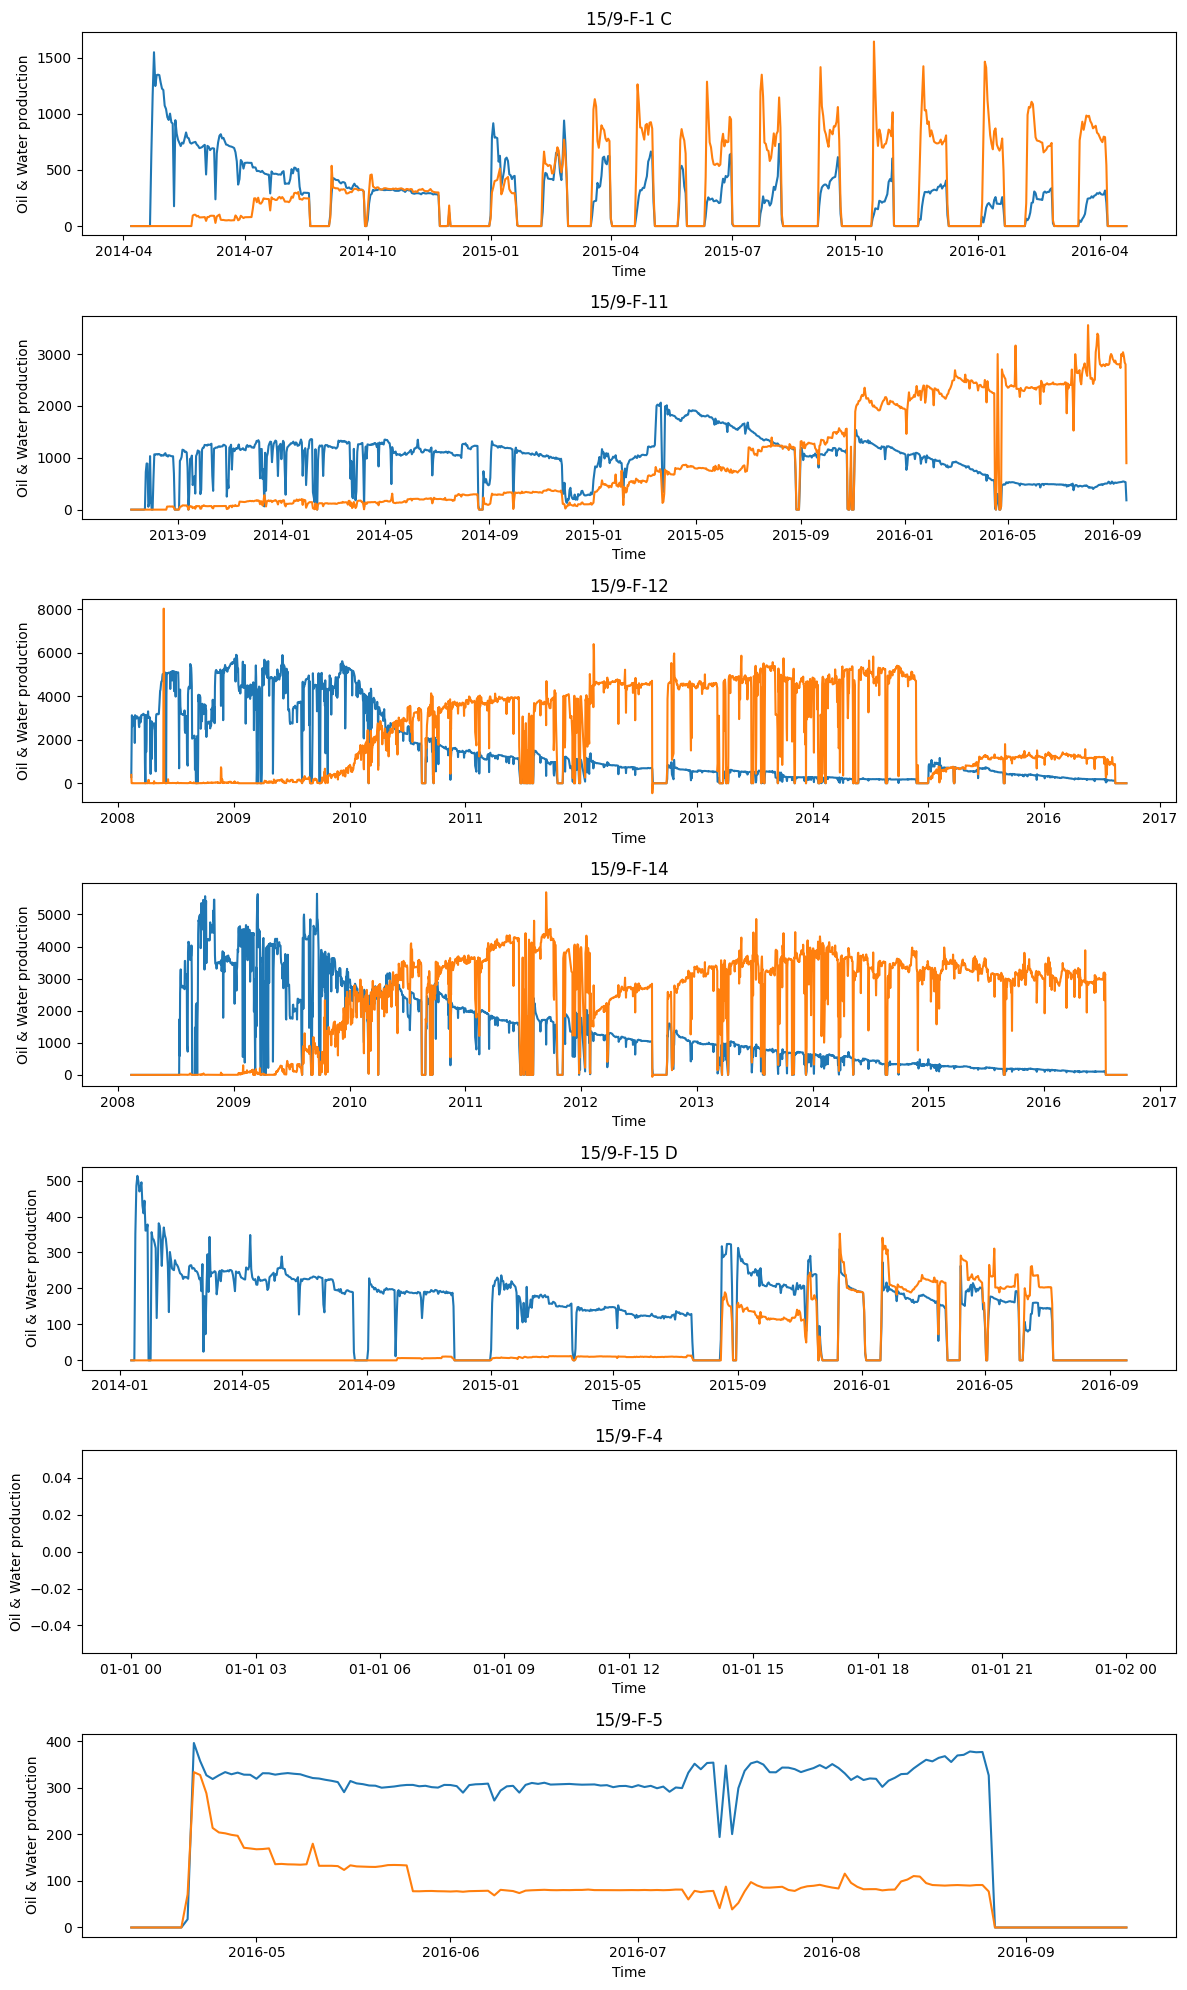

In [83]:
# Relationship between oil production and water production for each well
wells = daily_df["NPD_WELL_BORE_NAME"].unique()  # Get all unique well names
plt.figure(figsize=(12,20))                      # Set the overall figure size

for i, well in enumerate(wells):                 # Loop through each well
    d = daily_df[daily_df["NPD_WELL_BORE_NAME"]==well]  # Filter data for this well
    plt.subplot(len(wells),1,i+1)                # Create a subplot for each well
    plt.plot(d["DATEPRD"], d["BORE_OIL_VOL"])    # Plot oil production over time
    plt.plot(d["DATEPRD"], d["BORE_WAT_VOL"])    # Plot water production over time
    plt.title(well)                              # Title with well name
    plt.xlabel("Time")                           # X-axis label
    plt.ylabel("Oil & Water production")         # Y-axis label

plt.tight_layout()                               # Adjust layout to prevent overlap
plt.show                                         # Show the plots (missing parentheses, should be plt.show())

/var/folders/w3/6g99c6wj1wn4plrslv4vrd2m0000gn/T/ipykernel_77173/1177116378.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


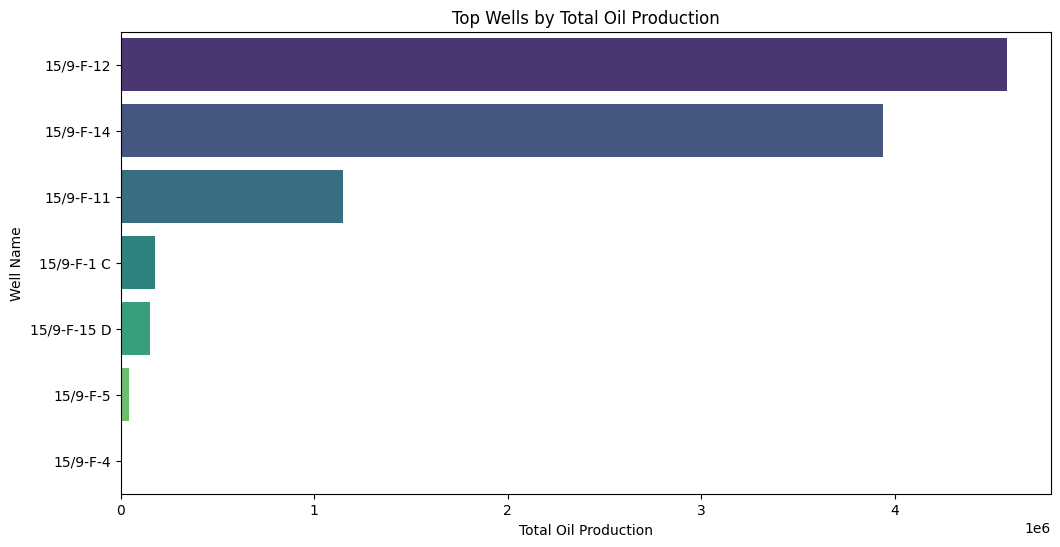

In [84]:
plt.figure(figsize=(12, 6))
sns.barplot(
	x=('BORE_OIL_VOL', 'sum'),
	y=('NPD_WELL_BORE_NAME', ''),
	data=well_summary.head(10),
	palette='viridis'
)
plt.title('Top Wells by Total Oil Production')
plt.xlabel('Total Oil Production')
plt.ylabel('Well Name')
plt.show()

In [85]:
target_col = 'BORE_OIL_VOL'
features_cols = [
    "ON_STREAM_HRS",
    "AVG_CHOKE_SIZE_P",
    "AVG_WHP_P",
    "AVG_WHT_P",
    "AVG_DOWNHOLE_PRESSURE",
    "AVG_DOWNHOLE_TEMPERATURE",
    "AVG_DP_TUBING",
    "AVG_ANNULUS_PRESS"
]
well_name=daily_df['NPD_WELL_BORE_NAME'].unique()[0]
well_data=daily_df[daily_df['NPD_WELL_BORE_NAME']==well_name].sort_values("DATEPRD")
well_data[features_cols + [target_col]].head()

,ON_STREAM_HRS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,BORE_OIL_VOL
0,0.0,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0
1,0.0,1.003059,0.00000,0.00000,NaN,NaN,NaN,0.0,0.0
2,0.0,0.979008,0.00000,0.00000,NaN,NaN,NaN,0.0,0.0
3,0.0,0.545759,0.00000,0.00000,NaN,NaN,NaN,0.0,0.0
4,0.0,1.215987,33.09788,10.47992,310.37614,96.87589,277.27826,0.0,0.0


In [86]:
well_data[features_cols] = well_data[features_cols].fillna(0)
